In [ ]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
M=pd.read_csv("digitData2.csv",header=None)
M.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4.0


In [ ]:
print(M.shape)

(1528, 65)


In [ ]:
X= np.empty((1528,64))
X=np.array(M.iloc[:,:-1])
print(X.shape)
print(X)

(1528, 64)
[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  0. ...  2.  0.  0.]
 [ 0.  0.  2. ...  0.  0.  0.]
 [ 0.  0.  1. ...  0.  0.  0.]]


In [ ]:
trueLabels= np.array(M.iloc[:,-1])

In [ ]:
print("M = ",M.shape)
print("X= ",X.shape)
print("trueLabels= ",trueLabels.shape)

M =  (1528, 65)
X=  (1528, 64)
trueLabels=  (1528,)


In [ ]:


from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=5)
kmeans.fit(X)
predicted=kmeans.predict(X)

from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score(trueLabels,predicted)

0.398093641184947

In [ ]:
import warnings; warnings.simplefilter('ignore')
from sklearn.metrics import adjusted_mutual_info_score
adjusted_mutual_info_score(trueLabels, predicted)

0.47290014360934446

In [ ]:
adj_rand_scores=[]
adj_mutual_info=[]
for k in list(range(1,50)):
    kmean=KMeans(n_clusters=k)
    kmean.fit(X)
    predicted=kmeans.predict(X)
    adj_rand_scores=adjusted_rand_score(trueLabels,predicted)
    adj_mutual_info=adjusted_mutual_info_score(trueLabels,predicted)
avgPerformance1=np.mean(adj_rand_scores)
avgPerformance2=np.mean(adj_mutual_info)
print(avgPerformance1,avgPerformance2)

0.398093641184947 0.47290014360934446



1.The value of averaged ARI over 20 repeatations wont change because ARI value ranges from -1 to 1. 
2.When number of cluster increases Rand Index value(RI) will increase upto 1 however Average Rand Index (ARI) doesnt.

In [ ]:

from sklearn.cluster import k_means_
from sklearn.metrics.pairwise import cosine_similarity, pairwise_distances
from sklearn.preprocessing import StandardScaler


def create_cluster(sparse_data, nclust = 10):

   
    def euc_dist(X, Y = None, Y_norm_squared = None, squared = False):
            return cosine_similarity(X, Y)
    k_means_.euclidean_distances = euc_dist
    
    scaler = StandardScaler(with_mean=False)
    sparse_data = scaler.fit_transform(sparse_data)
    kmeans = k_means_.KMeans(n_clusters = nclust, n_jobs = 20, random_state = 3425)
    _ = kmeans.fit(sparse_data)
    return kmeans.labels_

In [ ]:
k=5
predicted=create_cluster(X,k)
adj_rand_score=adjusted_rand_score(trueLabels,predicted)
adj_mutual_info=adjusted_mutual_info_score(trueLabels,predicted)
print(adj_rand_score)
print(adj_mutual_info)

0.2938436723744191
0.39396513803631045


In [ ]:
adj_rand_scores=[]
adj_mutual_info=[]
for k in list(range(1,50)):
    predicted=create_cluster(X,k)
    adj_rand_scores=adjusted_rand_score(trueLabels,predicted)
    adj_mutual_info=adjusted_mutual_info_score(trueLabels,predicted)
avgPerformance1=np.mean(adj_rand_scores)
avgPerformance2=np.mean(adj_mutual_info)
print(avgPerformance1,avgPerformance2)

0.35632094559635524 0.5450712964634341


#Comparing Clustering Performance
1.RAND score for the Euclidean distance is 0.398 which is higher than the RAND score of Cosine Similarity 0.356.
2.Since the RAND score of K means Euclidean distance is more, we can say that it performs better than the Cosine Similarity.

In [ ]:
#Part B
# Question 1
print(M.shape)

(1528, 65)


In [ ]:
from sklearn.preprocessing import scale
Xnorm = scale(M)
from sklearn.decomposition import PCA
pca = PCA(n_components=41)
pca.fit(Xnorm)


PCA(copy=True, iterated_power='auto', n_components=41, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
var= pca.explained_variance_ratio_
print(var)

[0.12012702 0.0965486  0.0828305  0.06516517 0.04882451 0.04319532
 0.03943346 0.03714306 0.03009792 0.02833582 0.0277005  0.02535963
 0.02268195 0.02220471 0.02128586 0.01909622 0.01722774 0.01703945
 0.01584551 0.01446521 0.0127709  0.01241635 0.01172973 0.0105868
 0.00987804 0.00916024 0.00877479 0.00837798 0.00809153 0.00702958
 0.00696809 0.00660755 0.00635295 0.0062838  0.00581909 0.00548021
 0.0050367  0.00499816 0.00458683 0.00423908 0.00397427]


[12.01 21.66 29.94 36.46 41.34 45.66 49.6  53.31 56.32 59.15 61.92 64.46
 66.73 68.95 71.08 72.99 74.71 76.41 77.99 79.44 80.72 81.96 83.13 84.19
 85.18 86.1  86.98 87.82 88.63 89.33 90.03 90.69 91.33 91.96 92.54 93.09
 93.59 94.09 94.55 94.97 95.37]


Text(0, 0.5, 'Variance captured')

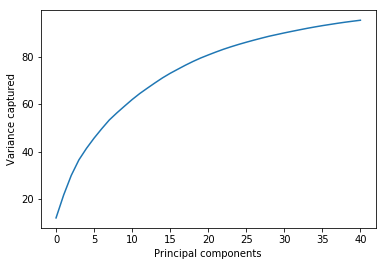

In [ ]:
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print(var1)
plt.plot(var1)
plt.xlabel("Principal components")
plt.ylabel("Variance captured")

In [ ]:
# 41 minimum dimension are required to capture at least 95% variance

In [ ]:
#Question 2
M.shape
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(M)
print(M.shape)
print(projected.shape)

(1528, 65)
(1528, 2)


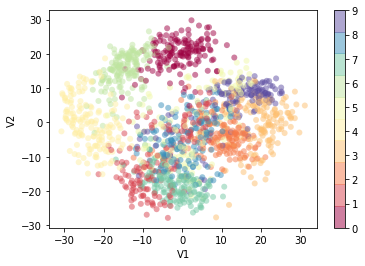

In [ ]:
plt.scatter(projected[:, 0], projected[:, 1],
            c=trueLabels, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('V1')
plt.ylabel('V2')
plt.colorbar();